In [14]:
# Challenge/ Determine the Summary Statistics for June and December seperatly. 
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

#Import the Python SQL toolkit 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# import matplotlib to plot data
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
# Set up the database engine this create_engine function allows us to access and query our database
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [17]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [18]:
#  3. Convert the June temperatures to a list.
# unravel the results into a one-dimensional array and convert that array into a list

june_temps = list(np.ravel(june_results))
june_temps

['2010-06-01',
 '78.0',
 '2010-06-02',
 '76.0',
 '2010-06-03',
 '78.0',
 '2010-06-04',
 '76.0',
 '2010-06-05',
 '77.0',
 '2010-06-06',
 '78.0',
 '2010-06-07',
 '77.0',
 '2010-06-08',
 '78.0',
 '2010-06-09',
 '78.0',
 '2010-06-10',
 '79.0',
 '2010-06-11',
 '78.0',
 '2010-06-12',
 '78.0',
 '2010-06-13',
 '78.0',
 '2010-06-14',
 '77.0',
 '2010-06-15',
 '78.0',
 '2010-06-16',
 '78.0',
 '2010-06-17',
 '77.0',
 '2010-06-18',
 '77.0',
 '2010-06-19',
 '82.0',
 '2010-06-20',
 '78.0',
 '2010-06-21',
 '78.0',
 '2010-06-22',
 '78.0',
 '2010-06-23',
 '78.0',
 '2010-06-24',
 '78.0',
 '2010-06-25',
 '77.0',
 '2010-06-26',
 '76.0',
 '2010-06-27',
 '78.0',
 '2010-06-28',
 '78.0',
 '2010-06-29',
 '78.0',
 '2010-06-30',
 '78.0',
 '2011-06-01',
 '77.0',
 '2011-06-02',
 '78.0',
 '2011-06-03',
 '73.0',
 '2011-06-04',
 '70.0',
 '2011-06-05',
 '76.0',
 '2011-06-06',
 '77.0',
 '2011-06-07',
 '77.0',
 '2011-06-08',
 '77.0',
 '2011-06-09',
 '77.0',
 '2011-06-10',
 '78.0',
 '2011-06-11',
 '77.0',
 '2011-06-12',
 

In [19]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date',  'June Temperatures'])
june_df.set_index(june_df['date'], inplace=True)
print(june_df)

                  date  June Temperatures
date                                     
2010-06-01  2010-06-01               78.0
2010-06-02  2010-06-02               76.0
2010-06-03  2010-06-03               78.0
2010-06-04  2010-06-04               76.0
2010-06-05  2010-06-05               77.0
...                ...                ...
2017-06-26  2017-06-26               79.0
2017-06-27  2017-06-27               74.0
2017-06-28  2017-06-28               74.0
2017-06-29  2017-06-29               76.0
2017-06-30  2017-06-30               75.0

[1700 rows x 2 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


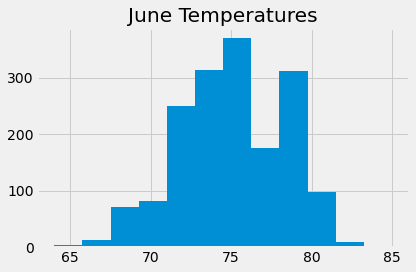

In [20]:
# # plot data with histogram for visulazation
june_df.hist(bins=12)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(dec_results))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame()
dec_df = pd.DataFrame(dec_results, columns=['date','December Temperatures'])
dec_df.set_index(dec_df['date'], inplace=True)
print(dec_df)

                  date  December Temperatures
date                                         
2010-12-01  2010-12-01                   76.0
2010-12-03  2010-12-03                   74.0
2010-12-04  2010-12-04                   74.0
2010-12-06  2010-12-06                   64.0
2010-12-07  2010-12-07                   64.0
...                ...                    ...
2016-12-27  2016-12-27                   71.0
2016-12-28  2016-12-28                   71.0
2016-12-29  2016-12-29                   69.0
2016-12-30  2016-12-30                   65.0
2016-12-31  2016-12-31                   65.0

[1517 rows x 2 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


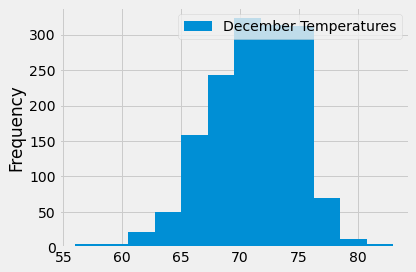

In [21]:
# plot data with histogram for visulization
dec_df.plot.hist(bins=12)
plt.tight_layout()